## 1. Implement logistic regression in python using batch gradient descent
Make sure you save the value of your loss function on each iteration in a data structure (e.g., list)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X = np.asarray ([[0.50], [0.75], [1.00], [1.25], [1.50], [1.75], [3.00], [4.75], [1.75], [3.25], [5.00], [2.00], [2.25], [2.50], [2.75], [3.50], [4.00], [4.25], [4.50], [5.50]])
y = np.asarray([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

def sigmoid(x):
    '''
    Standard logistic function
    Args:
        x: feature 
    Returns:
        a value between 0 and 1
    '''
    return 1.0 / (1 + np.exp(-x))

def cost(X, y, theta):
    '''
    Compute the cost (loss) for current values of theta 
    Args:
        X: features, a matrix containing the training data, one sample per row.
        y: labels, (the correct classification prediction for each sample)
        theta: weights
    Returns:
        cost: the cost for current values of theta 
    '''
    m = X.shape[0] # m: the number of samples
    h = sigmoid(X.dot(theta))
    cost = (-1 / m) * (np.log(h).T.dot(y) + np.log(1 - h).T.dot(1 - y))
    return cost

def gradient_descent(theta, alpha, X, y):
    '''
    Computes gradient of cost function with regards to theta 
    Args:
        theta: model parameters
        alpha: learning rate, refers to how much the parameters are changed on each iteration
        X: feature matrix
        y: labels
    Returns:
        theta: model parameters (weights)
    '''
    m = X.shape[0] # number of samples
    h = sigmoid(X.dot(theta))
    gradient = np.dot(X.T, (h - y)) / m
    theta = theta - alpha * gradient
    return theta

def fit(X, y, alpha, tolerance, max_iterations):
    '''
    Computes the model parameters (theta) and cost history
    Code runs until it converges or reaches iteration maximum
    Args:
        X: features, a matrix containing the training data, one sample per row.
        y: labels, (the correct classification prediction for each sample)
        alpha: learning rate
        tolerance: tolerance for stopping criteria. Set to 1e-4 as it's the default value in sklearn
        max_iterations: predetermined maximum number of iterations
    Returns:
        cost_list, theta: cost history and model parameters
    '''
    y = y.reshape([-1, 1])
    X = np.hstack([np.ones(X.shape), X])
    # set initial theta to zero
    theta = np.array([[0], [0]])
    converged_or_reached_max_it = False
    cost_list = []
    iter = 0
    while not converged_or_reached_max_it:
        previous_theta = theta
        theta = gradient_descent(theta, alpha, X, y) # update theta
        cost_list.append(cost(X, y, theta)[0][0]) # save cost
        iter += 1 # update iter
        if (abs(previous_theta[1] - theta[1]) < tolerance):
            print('Converged after {} iterations'.format(iter))
            converged_or_reached_max_it = True
        elif iter == max_iterations:
            print('Reached maximum number of iterations ({})'.format(max_iterations))
            converged_or_reached_max_it = True
    return cost_list, theta

In [6]:
alpha_list = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]
for alpha in alpha_list:
    cost_list, theta = fit(X, y, alpha, tolerance=0.0001, max_iterations=1000)
    print('Final weights: {} and {}\nFinal cost: {} \nNumber of iterations: {}, learning rate: {}\n'.format(theta[0], theta[1], cost_list[-1], len(cost_list), alpha))


Converged after 687 iterations
Final weights: [-0.04093017] and [0.14894718]
Final cost: 0.6520648201555802 
Number of iterations: 687, learning rate: 0.001

Reached maximum number of iterations (1000)
Final weights: [-0.46515761] and [0.3046505]
Final cost: 0.6037589301660239 
Number of iterations: 1000, learning rate: 0.005

Reached maximum number of iterations (1000)
Final weights: [-0.86732655] and [0.42567007]
Final cost: 0.5683372193518735 
Number of iterations: 1000, learning rate: 0.01

Reached maximum number of iterations (1000)
Final weights: [-2.30480177] and [0.87077579]
Final cost: 0.5017654029492665 
Number of iterations: 1000, learning rate: 0.05

Reached maximum number of iterations (1000)
Final weights: [-2.75078618] and [1.01213999]
Final cost: 0.49671946907411996 
Number of iterations: 1000, learning rate: 0.1

Converged after 353 iterations
Final weights: [-2.89476336] and [1.05805608]
Final cost: 0.4963392091635741 
Number of iterations: 353, learning rate: 0.5

Co

### 2. After how many iterations, and for which learning rate (α) did your algorithm converge? Plot the loss function with respect to iterations to illustrate this point.

Converged after 687 iterations
Reached maximum number of iterations (1000)
Reached maximum number of iterations (1000)
Reached maximum number of iterations (1000)
Reached maximum number of iterations (1000)
Converged after 353 iterations

Figure 1. Graph of loss function vs. iterations during training (maximum iterations = 1000, tolerance = 0.0001)


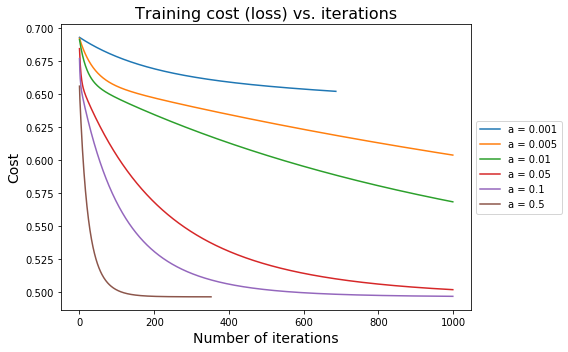

In [12]:
alphas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
plt.figure(figsize=(8,5))
for alpha in alphas:
    costs, theta = fit(X, y, alpha, 0.0001, 1000)
    costs = np.array(costs)
    plt.plot(costs)

plt.xlabel('Number of iterations', fontsize=14) 
plt.ylabel('Cost', fontsize=14) 
plt.title('Training cost (loss) vs. iterations', fontsize=16)
plt.legend(['a = 0.001', 'a = 0.005', 'a = 0.01', 'a = 0.05', 'a = 0.1', 'a = 0.5'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
print('\nFigure 1. Graph of loss function vs. iterations during training (maximum iterations = 1000, tolerance = 0.0001)')


Converged after 687 iterations
Converged after 2380 iterations
Converged after 3008 iterations
Converged after 1696 iterations
Converged after 1117 iterations
Converged after 353 iterations

Figure 2. Graph of loss function vs. iterations during training (maximum iterations = 10000, tolerance = 0.0001)


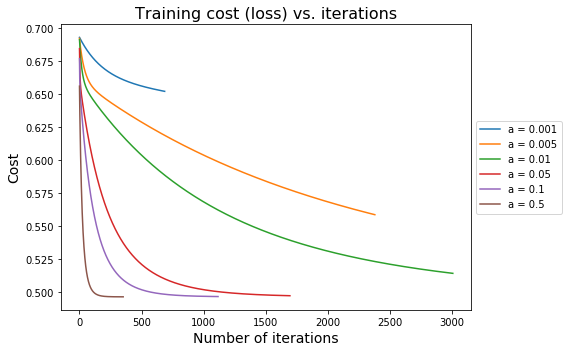

In [13]:
alphas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
plt.figure(figsize=(8,5))
for alpha in alphas:
    costs, theta = fit(X, y, alpha, 0.0001, 10000)
    costs = np.array(costs)
    plt.plot(costs)

plt.xlabel('Number of iterations', fontsize=14) 
plt.ylabel('Cost', fontsize=14) 
plt.title('Training cost (loss) vs. iterations', fontsize=16)
plt.legend(['a = 0.001', 'a = 0.005', 'a = 0.01', 'a = 0.05', 'a = 0.1', 'a = 0.5'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

print('\nFigure 2. Graph of loss function vs. iterations during training (maximum iterations = 10000, tolerance = 0.0001)')


### 3. What happens if α is too large? How does this affect the loss function? Plot the loss function with respect to iterations to illustrate this point.

Reached maximum number of iterations (100)


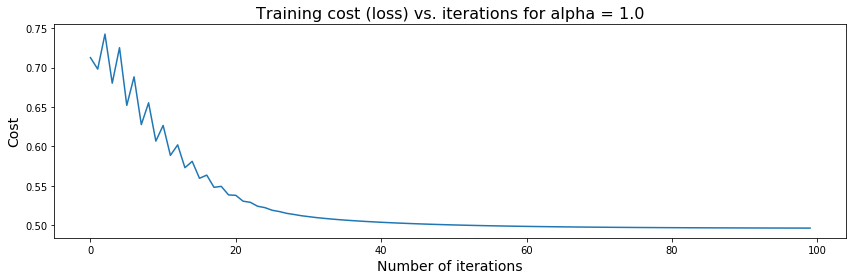

In [20]:
costs, theta = fit(X, y, alpha=1.0, tolerance=0.0001, max_iterations=100)
plt.figure(figsize=(12,4))
plt.plot(costs)
plt.xlabel('Number of iterations', fontsize=14) 
plt.ylabel('Cost', fontsize=14) 
plt.title('Training cost (loss) vs. iterations for alpha = 1.0', fontsize=16)
plt.tight_layout()
plt.show()

Reached maximum number of iterations (100)


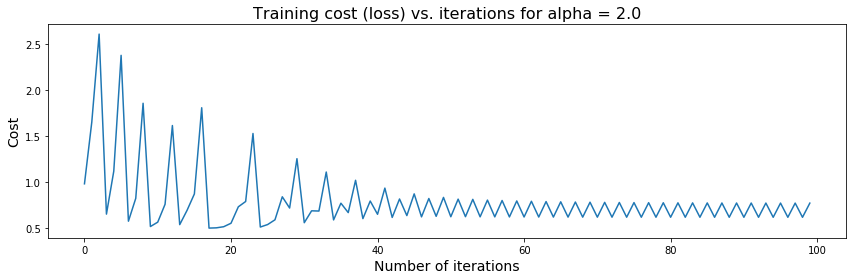

In [22]:
costs, theta = fit(X, y, alpha=2.0, tolerance=0.0001, max_iterations=100)
plt.figure(figsize=(12,4))
plt.plot(costs)
plt.xlabel('Number of iterations', fontsize=14) 
plt.ylabel('Cost', fontsize=14) 
plt.title('Training cost (loss) vs. iterations for alpha = 2.0', fontsize=16)
plt.tight_layout()
plt.show()

Reached maximum number of iterations (100)


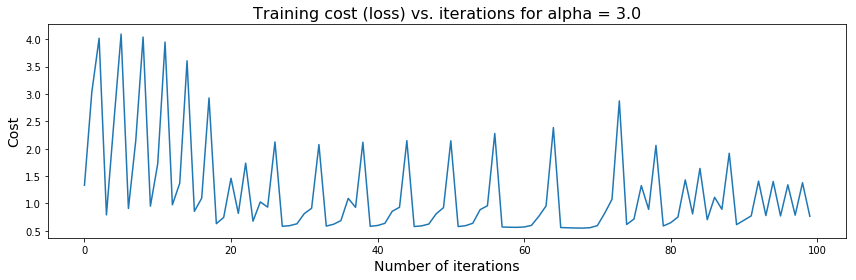

In [29]:
costs, theta = fit(X, y, alpha=3.0, tolerance=0.0001, max_iterations=100)
plt.figure(figsize=(12,4))
plt.plot(costs)
plt.xlabel('Number of iterations', fontsize=14) 
plt.ylabel('Cost', fontsize=14) 
plt.title('Training cost (loss) vs. iterations for alpha = 3.0', fontsize=16)
plt.tight_layout()
plt.show()

Reached maximum number of iterations (500)


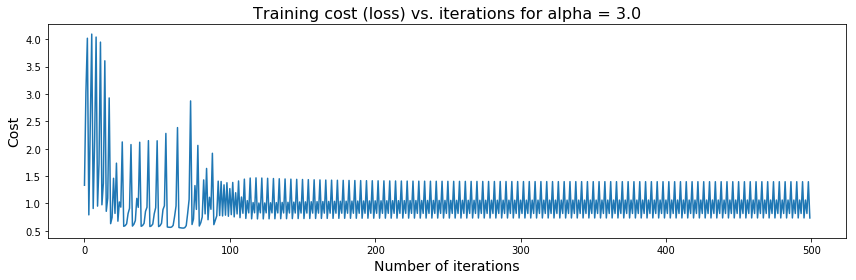

In [31]:
costs, theta = fit(X, y, alpha=3.0, tolerance=0.0001, max_iterations=500)
plt.figure(figsize=(12,4))
plt.plot(costs)
plt.xlabel('Number of iterations', fontsize=14) 
plt.ylabel('Cost', fontsize=14) 
plt.title('Training cost (loss) vs. iterations for alpha = 3.0', fontsize=16)
plt.tight_layout()
plt.show()